In [1]:
import os
import cv2 as cv
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [3]:
path=r"../input/cat-and-dog/training_set/training_set"

In [4]:
p=[]

In [5]:
for i in os.listdir(path):
    p.append(i)
    

In [6]:
p

['dogs', 'cats']

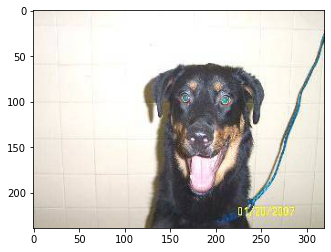

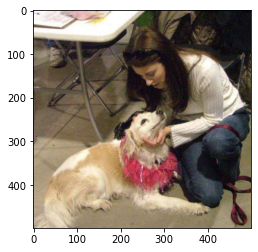

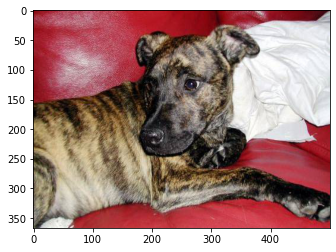

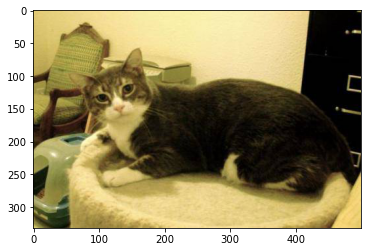

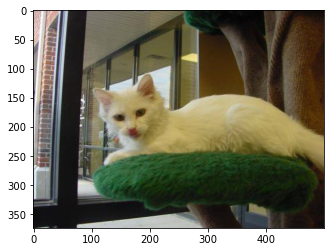

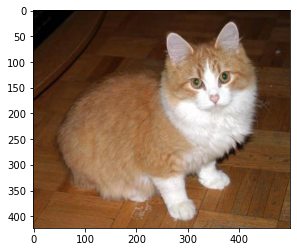

In [7]:

for m in p:
    k=0
    pat=os.path.join(path,m)
    for img in os.listdir(pat):
        img_path=os.path.join(pat,img)
        if k<3:
            img_array=mpimg.imread(img_path)
            plt.imshow(img_array)
            plt.show()
            k=k+1
        else:
            break
        

In [8]:
features=[]
labels=[]

In [9]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [10]:
char_dir={}
for char in os.listdir(path):
    char_dir[char]=len(os.listdir(os.path.join(path,char)))

In [11]:
char_dir

{'dogs': 4006, 'cats': 4001}

In [12]:
label=0
for m in p:
    k=0
    pat=os.path.join(path,m)
    for img in os.listdir(pat):
        img_path=os.path.join(pat,img)
        if k<800:
            photo = load_img(img_path, target_size=(200, 200))
            photo = img_to_array(photo)
            features.append(photo)
            labels.append(label)
            k=k+1
        else:
            label=1
            break
        

In [13]:
val=[]
vallabels=[]

In [14]:
label=0
for m in p:
    k=0
    mn=0
    pat=os.path.join(path,m)
    for img in os.listdir(pat):
        img_path=os.path.join(pat,img)
        if mn<800:
            mn=mn+1
        else:
            try:
                if k<200:
                    photo = load_img(img_path, target_size=(200, 200))
                    photo = img_to_array(photo)
                    val.append(photo)
                    vallabels.append(label)
                    k=k+1
                else:
                    label=1
                    break
            except:
                print("hello")

hello
hello


In [15]:
val=np.array(val)

In [16]:
val=val/255

In [17]:
vallabels=np.array(vallabels)
features=np.array(features)
labels=np.array(labels)

In [18]:
features=features/255

In [19]:
features

array([[[[0.92941177, 0.9019608 , 0.87058824],
         [0.92941177, 0.9019608 , 0.87058824],
         [0.92941177, 0.9019608 , 0.87058824],
         ...,
         [0.87058824, 0.85490197, 0.8117647 ],
         [0.8745098 , 0.85882354, 0.8156863 ],
         [0.87058824, 0.85490197, 0.8117647 ]],

        [[0.92941177, 0.9019608 , 0.87058824],
         [0.92941177, 0.9019608 , 0.87058824],
         [0.92941177, 0.9019608 , 0.87058824],
         ...,
         [0.8784314 , 0.8627451 , 0.81960785],
         [0.88235295, 0.8666667 , 0.8235294 ],
         [0.87058824, 0.85490197, 0.8117647 ]],

        [[0.93333334, 0.90588236, 0.8745098 ],
         [0.93333334, 0.90588236, 0.8745098 ],
         [0.93333334, 0.90588236, 0.8745098 ],
         ...,
         [0.8980392 , 0.88235295, 0.8392157 ],
         [0.89411765, 0.8784314 , 0.8352941 ],
         [0.87058824, 0.85490197, 0.8117647 ]],

        ...,

        [[0.7372549 , 0.7019608 , 0.63529414],
         [0.72156864, 0.6862745 , 0.61960787]

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.optimizers import RMSprop,Adam,SGD

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
features.shape

(1600, 200, 200, 3)

In [23]:
val.shape

(400, 200, 200, 3)

In [24]:
labels.shape

(1600,)

In [25]:
model.fit(features,labels,
                    batch_size=64,
                    epochs=80,
                    verbose=2,
                    validation_data=(val,vallabels))

Epoch 1/80
25/25 - 2s - loss: 0.7223 - accuracy: 0.5337 - val_loss: 0.6660 - val_accuracy: 0.6700
Epoch 2/80
25/25 - 1s - loss: 0.6735 - accuracy: 0.5800 - val_loss: 0.6514 - val_accuracy: 0.6275
Epoch 3/80
25/25 - 2s - loss: 0.6560 - accuracy: 0.5994 - val_loss: 0.6432 - val_accuracy: 0.6575
Epoch 4/80
25/25 - 1s - loss: 0.6451 - accuracy: 0.6187 - val_loss: 0.6270 - val_accuracy: 0.6625
Epoch 5/80
25/25 - 1s - loss: 0.6412 - accuracy: 0.6381 - val_loss: 0.6204 - val_accuracy: 0.6850
Epoch 6/80
25/25 - 1s - loss: 0.6331 - accuracy: 0.6419 - val_loss: 0.6190 - val_accuracy: 0.6550
Epoch 7/80
25/25 - 1s - loss: 0.6468 - accuracy: 0.6106 - val_loss: 0.6214 - val_accuracy: 0.6775
Epoch 8/80
25/25 - 1s - loss: 0.6122 - accuracy: 0.6775 - val_loss: 0.6111 - val_accuracy: 0.6925
Epoch 9/80
25/25 - 1s - loss: 0.5888 - accuracy: 0.7075 - val_loss: 0.6146 - val_accuracy: 0.6575
Epoch 10/80
25/25 - 1s - loss: 0.5872 - accuracy: 0.6875 - val_loss: 0.5928 - val_accuracy: 0.6950
Epoch 11/80
25/25 -